2.6.0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


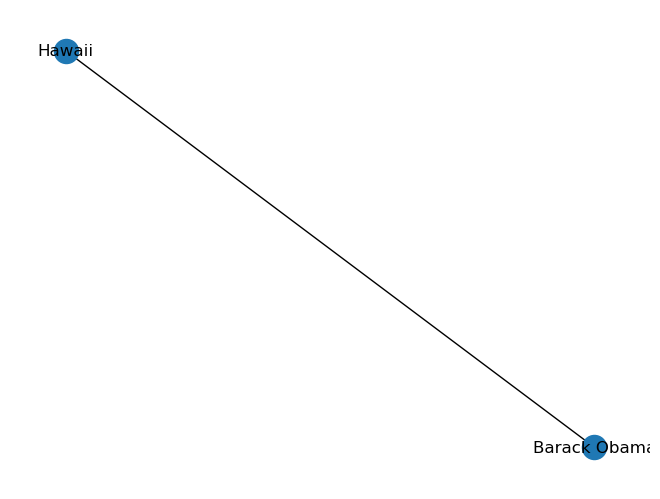

In [1]:
import sqlite3
from sqlite3 import Error

def create_connection():
    conn = None;
    try:
        conn = sqlite3.connect(':memory:') # creating a temporary in-memory database
        print(sqlite3.version)
    except Error as e:
        print(e)

    if conn:
        return conn

def create_table(conn):
    try:
        sql_create_table_query = '''CREATE TABLE graph(
                                id integer PRIMARY KEY,
                                node text NOT NULL,
                                edge text,
                                weight real); '''
        conn.execute(sql_create_table_query)
    except Error as e:
        print(e)

def insert_node(conn, node):
    try:
        sql_insert_node_query = '''INSERT INTO graph(node, edge, weight)
                          VALUES(?,?,?);'''
        conn.execute(sql_insert_node_query, node)
    except Error as e:
        print(e)

conn = create_connection()

with conn:
    create_table(conn)
    node = ('Node1', 'Edge1', 1.0)
    insert_node(conn, node)

import nltk
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt

def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == nltk.Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk

def draw_graph(text):
    entities = get_continuous_chunks(text)
    graph = nx.Graph()

    for entity in entities:
        graph.add_node(entity)

    # for simplicity, let's connect each entity to the next one
    for i in range(len(entities) - 1):
        graph.add_edge(entities[i], entities[i + 1])

    nx.draw(graph, with_labels=True)
    plt.show()

text = "Barack Obama was born in Hawaii. He was elected president in 2008."
draw_graph(text)
